In [1]:
import random
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
from dijkstar import Graph, find_path

In [15]:
def generate_instance_matrix(nb_vertex, min_weight, max_weight):
  graph = np.ones((nb_vertex, nb_vertex))*np.inf
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < 0.3:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == np.inf)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def convert_graph(graph):
  graph_dijkstra = Graph()
  for i in range(len(graph)):
    for j in range(len(graph)):
      graph_dijkstra.add_edge(i, j,graph[i][j])
  return graph_dijkstra

def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != np.inf):
    return graph[i][j], [i, j]
  else:
    if i != j:
      shortest_path = find_path(graph, i,j)
      return shortest_path.total_cost, shortest_path.nodes
    else:
      return 0, None

def get_complete_graph(graph, node_list):
  all_paths = {}
  converted_graph = convert_graph(graph)
  complete_graph = np.zeros((len(node_list), len(node_list)))
  for i in node_list:
    voisins_array = np.delete(node_list, np.where(node_list == i))
    for j in voisins_array:
      distance, path = get_distance_between_nodes(converted_graph, i, j)
      complete_graph[np.where(node_list == i)[0][0]][np.where(node_list == j)[0][0]] = distance
      all_paths[(np.where(node_list == i)[0][0], np.where(node_list == j)[0][0])] = path
  return complete_graph, all_paths

def generate_instance(nb_vertex, min_weight, max_weight, node_list):
  graph = generate_instance_matrix(nb_vertex,min_weight,max_weight)
  complete_graph, all_paths = get_complete_graph(graph, np.array(node_list))
  return graph, complete_graph, all_paths

In [26]:
graph, complete_graph, all_paths = generate_instance(1000,10,60, [0,24,69,32,46,52,60,18,19,20,22,35,53,1,240,690,320,460,520,600,180,109,200,220,350,530])

In [30]:
# print(graph, complete_graph,all_paths)

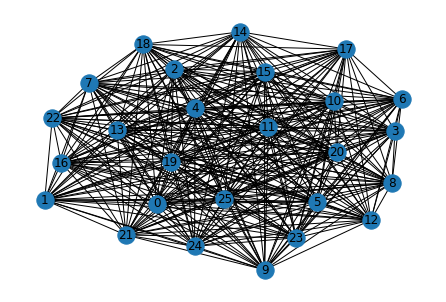

In [31]:
GZ = complete_graph
GZ[GZ == np.inf] = 0

GV = nx.from_numpy_matrix(GZ) 
nx.draw(GV, with_labels=True)

In [ ]:
def get_random_vertex(size, nb_vertex):
    random_vertex = []
    all_vertex = np.array(range(size))
    for i in range(nb_vertex):
        value = random.choice(all_vertex)
        random_vertex.append(value)
        all_vertex = np.delete(all_vertex, np.where(all_vertex == value))
        print(len(all_vertex))
    return random_vertex
            
len(set(rand(len(graph),1000)))